In [1]:
import pandas as pd
import numpy as np
import time

def gen():
    f = open('/Users/sarthak/Downloads/AP_train.txt', 'r',  encoding="utf8")
    #f = open('test.txt', 'r',  encoding="utf8")
    readFile = f.readlines()
    mainlist = []
    authorlist = []
    citelist = []
    maindict = dict()
    authordict = dict()
    citedict = dict()
    for line in readFile:
        if '#index' in line[:7]:
            tempid = line[7:].rstrip()
            maindict['id'] = tempid
        elif '#*' in line[:3]:
            maindict['title'] = line[3:].rstrip()
        elif '#@' in line[:3]:
            for author in line[3:].strip().rsplit(";"):
                authordict['id'] = tempid
                authordict['author'] = author.strip()
                authorlist.append(authordict)
                authordict = dict()
        elif '#t' in line[:3]:
            maindict['year'] = line[3:].rstrip()
        elif '#c' in line[:3]:
            maindict['venue'] = line[3:].rstrip()
        elif '#%' in line[:3]:
            citedict['id'] = tempid
            citedict['citations'] = line[3:].rstrip()
            citelist.append(citedict)
            citedict = dict()
        elif '#!' in line[:3]:
            maindict['abstract'] = line[3:].rstrip()
        else:
            mainlist.append(maindict)
            maindict = dict()
    mainlist.append(maindict)
    return mainlist,authorlist,citelist        
        
mainlist,authorlist,citelist = gen()        

In [2]:
main_tab = pd.DataFrame(mainlist, columns =('id', 'title', 'year', 
                                  'venue', 'abstract'))
author_tab = pd.DataFrame(authorlist, columns =('id', 'author'))
cite_tab = pd.DataFrame(citelist, columns =('id', 'citations'))


#author_publication[author_publication['author'] != '']

In [3]:
final_db = main_tab.merge(author_tab, how = 'outer' , on ='id').merge(cite_tab, how='outer', on='id')

In [4]:
#a
authorcount = str(len(final_db.author.unique()))
pubcount = str(len(final_db.id.unique()))
pubvcount = str(len(final_db.venue.unique()))
citecount = str(cite_tab.id.count())

print("Author Count", authorcount,
"Publication Count", pubcount,
"Publication Venue Count", pubvcount,
"Citation Count", citecount)

Author Count 1478735 Publication Count 1976816 Publication Venue Count 255687 Citation Count 7250326


In [5]:
#b
final_db[final_db['venue'].str.contains('Principles and Practice of Knowledge Discovery in Databases', na=False)]
#2 instead of 1. 04,05

,id,title,year,venue,abstract,author,citations
5467480,799597,Summarization of dynamic content in web collec...,2004,PKDD '04 Proceedings of the 8th European Confe...,This paper describes a new research proposal o...,Adam Jatowt,168251
5467481,799597,Summarization of dynamic content in web collec...,2004,PKDD '04 Proceedings of the 8th European Confe...,This paper describes a new research proposal o...,Adam Jatowt,207272
5467482,799597,Summarization of dynamic content in web collec...,2004,PKDD '04 Proceedings of the 8th European Confe...,This paper describes a new research proposal o...,Adam Jatowt,217578
5467483,799597,Summarization of dynamic content in web collec...,2004,PKDD '04 Proceedings of the 8th European Confe...,This paper describes a new research proposal o...,Adam Jatowt,272249
5467484,799597,Summarization of dynamic content in web collec...,2004,PKDD '04 Proceedings of the 8th European Confe...,This paper describes a new research proposal o...,Adam Jatowt,287616
5467485,799597,Summarization of dynamic content in web collec...,2004,PKDD '04 Proceedings of the 8th European Confe...,This paper describes a new research proposal o...,Adam Jatowt,357908
5467486,799597,Summarization of dynamic content in web collec...,2004,PKDD '04 Proceedings of the 8th European Confe...,This paper describes a new research proposal o...,Adam Jatowt,411775
5467487,799597,Summarization of dynamic content in web collec...,2004,PKDD '04 Proceedings of the 8th European Confe...,This paper describes a new research proposal o...,Adam Jatowt,445834
5467488,799597,Summarization of dynamic content in web collec...,2004,PKDD '04 Proceedings of the 8th European Confe...,This paper describes a new research proposal o...,Mitsuru Ishizuka,168251
5467489,799597,Summarization of dynamic content in web collec...,2004,PKDD '04 Proceedings of the 8th European Confe...,This paper describes a new research proposal o...,Mitsuru Ishizuka,207272


In [6]:
#c
import matplotlib.pyplot as plt

author_publication = author_tab.groupby('author').size().reset_index(name='pub count')
author_publication = author_publication[author_publication['author'] != '']
plt.hist(author_publication['pub count'], log=True)
plt.xlabel('No. of Publications')
plt.ylabel('No. of Authors')
plt.title('No. of publications per author')
plt.show()

In [7]:
#d
author_publication['pub count'].describe()
#median is middle element and since the data is right skewed

count    1.478733e+06
mean     3.291786e+00
std      8.871893e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.071000e+03
Name: pub count, dtype: float64

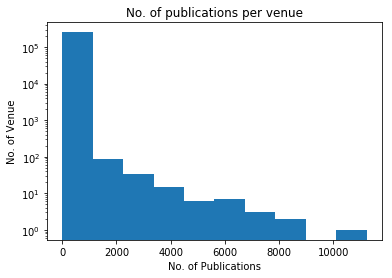

count    255686.000000
mean          7.731417
std          83.381219
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max       11227.000000
Name: pub count, dtype: float64

In [8]:
#e
import matplotlib.pyplot as plt

venue_publication = main_tab.groupby('venue').size().reset_index(name='pub count')
#author_publication = author_publication[author_publication['author'] != '']
plt.hist(venue_publication['pub count'], log=True)
plt.xlabel('No. of Publications')
plt.ylabel('No. of Venue')
plt.title('No. of publications per venue')
plt.show()
venue_publication['pub count'].describe()


In [9]:
#e
venue_publication[venue_publication['pub count'] == venue_publication['pub count'].max()]

,venue,pub count
111542,IEEE Transactions on Information Theory,11227


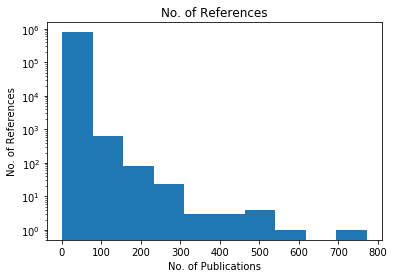

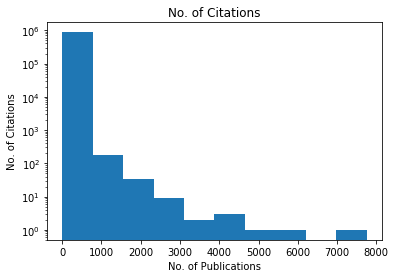

In [10]:
#f
import matplotlib.pyplot as plt

ref_publication = cite_tab.groupby('id').size().reset_index(name='ref count')
plt.hist(ref_publication['ref count'], log=True)
plt.xlabel('No. of Publications')
plt.ylabel('No. of References')
plt.title('No. of References')
plt.show()

cite_publication = cite_tab.groupby('citations').size().reset_index(name='cite count')
plt.hist(cite_publication['cite count'], log=True)
plt.xlabel('No. of Publications')
plt.ylabel('No. of Citations')
plt.title('No. of Citations')
plt.show()



In [11]:
#f
cite_publication.sort_values(['cite count'], ascending=False).head(1)

,citations,cite count
526604,408396,7753


In [12]:
#f
ref_publication.sort_values(['ref count'], ascending=False).head(1)

,id,ref count
665802,719353,772


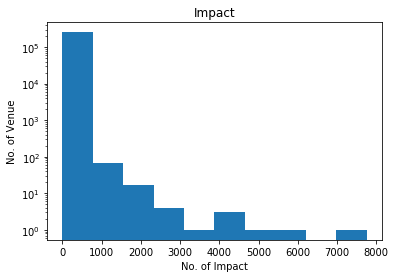

In [13]:
#g
temp_df = main_tab[['id', 'venue']]
#temp_df2 = cite_pubication.rename(columns = {'citations':'id'})
temp_df3 = temp_df.merge(cite_publication, how='outer', left_on='id', right_on='citations')
temp_df3 = temp_df3[temp_df3['venue'] != '']
temp_df4 = temp_df3.groupby('venue')['cite count'].sum().reset_index().rename(columns={'venue':'venue','cite count' : 'cite'})
temp_df5 = temp_df3.groupby('venue')['id'].count().reset_index().rename(columns={'venue':'venue','id' : 'listid'})
impact_df = temp_df4.merge(temp_df5, how='outer', on='venue')
impact_df['impact']= impact_df['cite']/impact_df['listid']
plt.hist(impact_df['impact'], log=True)
plt.xlabel('No. of Impact')
plt.ylabel('No. of Venue')
plt.title('Impact')
plt.show()

In [14]:
#h
impact_df.sort_values(['impact'], ascending=False).head(1)

,venue,cite,listid,impact
58232,Computers and Intractability: A Guide to the T...,7753.0,1,7753.0


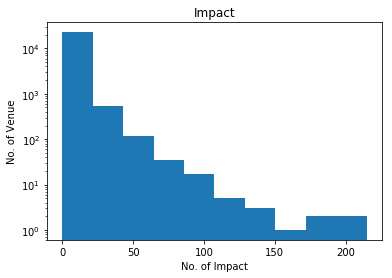

In [15]:
#i
temp_df6 = temp_df3.groupby('venue')['id'].count().reset_index().rename(columns={'venue':'venue','id' : 'listid'})
temp_df6 = temp_df6.loc[temp_df6['listid'] > 9]
impact_df_10 = temp_df4.merge(temp_df6, how='inner', on='venue')
impact_df_10['impact']= impact_df_10['cite']/impact_df_10['listid']
plt.hist(impact_df_10['impact'], log=True)
plt.xlabel('No. of Impact')
plt.ylabel('No. of Venue')
plt.title('Impact')
plt.show()

In [16]:
#i
top_venue_df = impact_df_10.sort_values(['impact'], ascending=False).head(1)
top_venue_df = temp_df.merge(top_venue_df, how='inner', on='venue')
top_venue_df = top_venue_df.rename(columns = {'id' : 'citations'})
top_venue_df = cite_publication.merge(top_venue_df, how='inner', on='citations')
top_venue_df

,citations,cite count,venue,cite,listid,impact
0,340164,167,Proceedings of the 2001 conference on Applicat...,4941.0,23,214.826087
1,340165,115,Proceedings of the 2001 conference on Applicat...,4941.0,23,214.826087
2,340166,48,Proceedings of the 2001 conference on Applicat...,4941.0,23,214.826087
3,340167,11,Proceedings of the 2001 conference on Applicat...,4941.0,23,214.826087
4,340168,138,Proceedings of the 2001 conference on Applicat...,4941.0,23,214.826087
5,340169,50,Proceedings of the 2001 conference on Applicat...,4941.0,23,214.826087
6,340170,10,Proceedings of the 2001 conference on Applicat...,4941.0,23,214.826087
7,340171,11,Proceedings of the 2001 conference on Applicat...,4941.0,23,214.826087
8,340172,112,Proceedings of the 2001 conference on Applicat...,4941.0,23,214.826087
9,340173,103,Proceedings of the 2001 conference on Applicat...,4941.0,23,214.826087


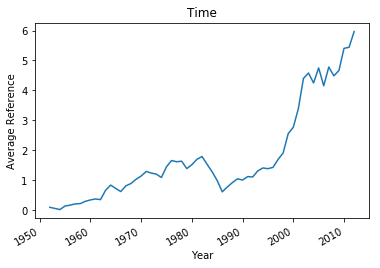

In [17]:
#j1
import matplotlib.pyplot as plt

j_temp_df = main_tab[['id', 'year']]

j_temp_df_2 = j_temp_df.groupby('year')['id'].count().reset_index()
j_temp_df_2['year'] =pd.to_numeric(j_temp_df_2['year'], errors = 'coerce').fillna(3333)
j_temp_df_2 = j_temp_df_2.rename(columns = ({'id' : 'publen'}))

j_temp_df = j_temp_df[j_temp_df['year'] != '']
j_temp_df['year'] =pd.to_numeric(j_temp_df['year'], errors = 'coerce').fillna(3333)


j_temp_df_ref = cite_tab.groupby('id').count().reset_index()


j_temp_df_ref_sum = j_temp_df.merge(j_temp_df_ref, how='inner', on='id')

j_temp_df_ref_sum = j_temp_df_ref_sum.groupby('year')['citations'].sum().reset_index()


j_temp_df_plot = j_temp_df_ref_sum.merge(j_temp_df_2, how='inner', on='year')
j_temp_df_plot = j_temp_df_plot[j_temp_df_plot['year'] != 3333]


j_temp_df_plot['avg'] =  j_temp_df_plot['citations'] / j_temp_df_plot['publen']
plt.plot(j_temp_df_plot['year'], j_temp_df_plot['avg'])
plt.gcf().autofmt_xdate()
plt.xlabel('Year')
plt.ylabel('Average Reference')
plt.title('Time')
plt.show()

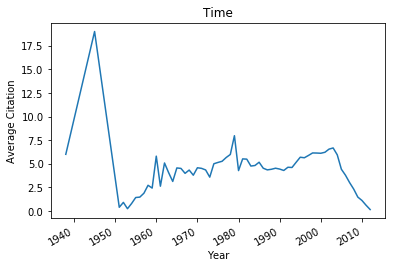

In [18]:
#j2



j_temp_df_cite = cite_tab.groupby('citations').count().reset_index()
j_temp_df_cite = j_temp_df_cite.rename(columns = ({'id' : 'cite count'}))


j_temp_df = j_temp_df.merge(j_temp_df_cite, how='inner', left_on='id', right_on='citations')

j_temp_df = j_temp_df.groupby('year')['cite count'].sum().reset_index()

j_temp_df_plot_new = j_temp_df.merge(j_temp_df_2, how='inner', on='year')
j_temp_df_plot_new = j_temp_df_plot_new[j_temp_df_plot_new['year'] != 3333]


j_temp_df_plot_new['avg'] =  j_temp_df_plot_new['cite count'] / j_temp_df_plot_new['publen']
plt.plot(j_temp_df_plot_new['year'], j_temp_df_plot_new['avg'])
plt.gcf().autofmt_xdate()
plt.xlabel('Year')
plt.ylabel('Average Citation')
plt.title('Time')
plt.show()

